# Data exploration for national vaccination

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.pyplot as plt
import util
from PIL import Image

## Loading data

In [2]:
STUDY_END_DATE = datetime.fromisoformat('2022-12-31')

In [3]:
df_general = pd.read_csv('data/input/OurWorldData/owid-covid-data.csv')
df_general.date = pd.to_datetime(df_general.date, infer_datetime_format=True)

In [4]:
df_brazil = df_general[(df_general.location == 'Brazil') & (df_general.date <= STUDY_END_DATE)]

In [5]:
df_brazil[['date', 'people_vaccinated', 'people_fully_vaccinated', 'population']]

,date,people_vaccinated,people_fully_vaccinated,population
42007,2020-01-03,NaN,NaN,215313504.0
42008,2020-01-04,NaN,NaN,215313504.0
42009,2020-01-05,NaN,NaN,215313504.0
42010,2020-01-06,NaN,NaN,215313504.0
42011,2020-01-07,NaN,NaN,215313504.0
...,...,...,...,...
43096,2022-12-27,188549744.0,174881292.0,215313504.0
43097,2022-12-28,NaN,NaN,215313504.0
43098,2022-12-29,188552661.0,174886102.0,215313504.0
43099,2022-12-30,188553047.0,174886846.0,215313504.0


In [6]:
df_brazil['people_vaccinated_percentual'] = df_brazil.people_vaccinated / df_brazil.population * 100
df_brazil['people_fully_vaccinated_percentual'] = df_brazil.people_fully_vaccinated / df_brazil.population * 100

/tmp/ipykernel_21478/2932705632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['people_vaccinated_percentual'] = df_brazil.people_vaccinated / df_brazil.population * 100
/tmp/ipykernel_21478/2932705632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['people_fully_vaccinated_percentual'] = df_brazil.people_fully_vaccinated / df_brazil.population * 100


In [7]:
df_brazil[['date', 'people_vaccinated_percentual', 'people_fully_vaccinated_percentual', 'population']]

,date,people_vaccinated_percentual,people_fully_vaccinated_percentual,population
42007,2020-01-03,NaN,NaN,215313504.0
42008,2020-01-04,NaN,NaN,215313504.0
42009,2020-01-05,NaN,NaN,215313504.0
42010,2020-01-06,NaN,NaN,215313504.0
42011,2020-01-07,NaN,NaN,215313504.0
...,...,...,...,...
43096,2022-12-27,87.569865,81.221702,215313504.0
43097,2022-12-28,NaN,NaN,215313504.0
43098,2022-12-29,87.571219,81.223936,215313504.0
43099,2022-12-30,87.571399,81.224281,215313504.0


## Plotting charts

In [8]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")

### Figure 3

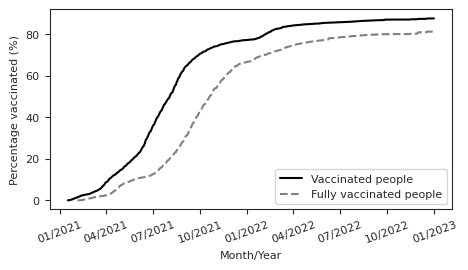

In [12]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))


plt.plot(df_brazil[df_brazil.people_vaccinated_percentual.isna()==False].date, df_brazil[df_brazil.people_vaccinated_percentual.isna()==False].people_vaccinated_percentual, color='black', label='Vaccinated people')

plt.plot(df_brazil[df_brazil.people_fully_vaccinated_percentual.isna()==False].date, df_brazil[df_brazil.people_fully_vaccinated_percentual.isna()==False].people_fully_vaccinated_percentual, color='gray', label='Fully vaccinated people', linestyle='--')

ax.legend()

plt.ylabel('Percentage vaccinated (%)')
ax.xaxis.set_major_formatter(myFmt)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.savefig('images/national_people_vaccinated.pdf', bbox_inches="tight")
plt.savefig('images/national_people_vaccinated.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/national_people_vaccinated.tiff")
img.save("images/national_people_vaccinated_compressed.tiff", compression="tiff_lzw")
plt.show()

In [10]:
df_brazil[df_brazil.people_vaccinated_percentual.isna()==False][['date', 'people_vaccinated_percentual', 'people_fully_vaccinated_percentual', 'population']]

,date,people_vaccinated_percentual,people_fully_vaccinated_percentual,population
42387,2021-01-17,0.000052,NaN,215313504.0
42388,2021-01-18,0.000515,NaN,215313504.0
42389,2021-01-19,0.006282,NaN,215313504.0
42390,2021-01-20,0.049149,NaN,215313504.0
42391,2021-01-21,0.089961,NaN,215313504.0
...,...,...,...,...
43095,2022-12-26,87.566878,81.218211,215313504.0
43096,2022-12-27,87.569865,81.221702,215313504.0
43098,2022-12-29,87.571219,81.223936,215313504.0
43099,2022-12-30,87.571399,81.224281,215313504.0


In [11]:
df_brazil.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't